In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import sklearn
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [2]:
# Take the data and create dataframe
df = pd.read_csv(r'D:\Abhiram\3-2\ML\Assignments\1\data.csv')
df

,YEAR,Rainfall in June
0,1901,22.7
1,1902,59.9
2,1903,26.2
3,1904,53.4
4,1905,23.1
...,...,...
112,2011,119.5
113,2012,21.7
114,2013,155.0
115,2014,31.3


In [3]:
df.shape[0] #number of rows

117

In [4]:
rainfall = 'Rainfall in June'
year = 'YEAR'

In [5]:
df[rainfall].mean() #mean rainfall

72.95752212389381

In [6]:
median_value = df[rainfall].median() #median rainfall
median_value

69.9

In [7]:
df[rainfall].mode() #mode of the given rainfall values

0    42.9
Name: Rainfall in June, dtype: float64

In [8]:
df[rainfall].std() #standard deviation of given rainfall values

35.968989136749386

In [9]:
#4. Filling median values in the rows that have missing values
# We can also try filling mean or mode values

df[rainfall] = df[rainfall].fillna(median_value)
df

,YEAR,Rainfall in June
0,1901,22.7
1,1902,59.9
2,1903,26.2
3,1904,53.4
4,1905,23.1
...,...,...
112,2011,119.5
113,2012,21.7
114,2013,155.0
115,2014,31.3


In [10]:
#5. Two rows in the CSV file have duplicates. Remove those duplicates by calling drop_duplicates method on the DataFrame.

df = df.drop_duplicates()
df

,YEAR,Rainfall in June
0,1901,22.7
1,1902,59.9
2,1903,26.2
3,1904,53.4
4,1905,23.1
...,...,...
112,2011,119.5
113,2012,21.7
114,2013,155.0
115,2014,31.3


In [12]:
# Now calculating the descriptive statistics again after imputing median values in the rows that have missing values and removing the duplicates.

mean_value = df[rainfall].mean() #mean rainfall
median_value = df[rainfall].median() #median rainfall
mode_value = df[rainfall].mode() #mode of the given rainfall values
standard_deviation_value = df[rainfall].std() #standard deviation of given rainfall values

print("mean = ", mean_value)
print("median = ", median_value)
print("mode = ", mode_value)
print("standard deviation = ", standard_deviation_value)

mean =  72.21652173913043
median =  69.9
mode =  0    69.9
Name: Rainfall in June, dtype: float64
standard deviation =  35.074762082785355


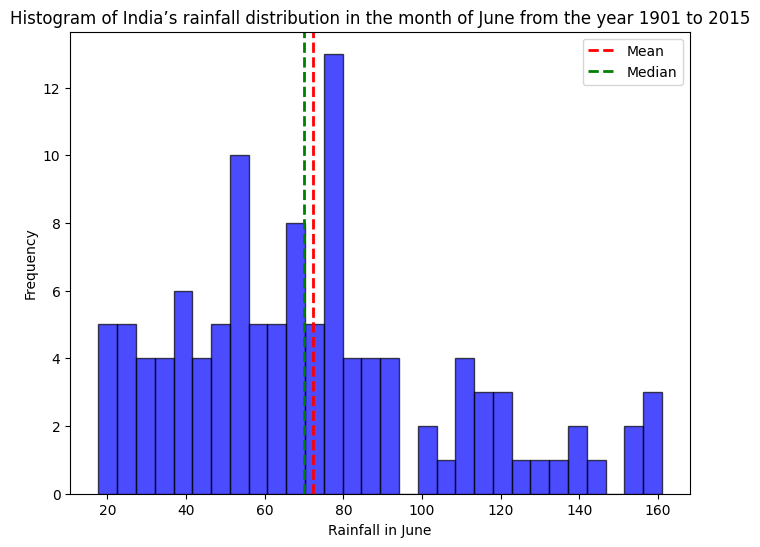

Mean: 72.21652173913043
Median: 69.9
The distribution is skewed to the right.


In [13]:
#6. Use Matplotlib to create a histogram plot of the data distribution to see if it is symmetry or skewed to the right or skewed to the left. Verify the behavior by comparing the Mean with Median. 

plt.figure(figsize=(8,6))
plt.hist(df[rainfall], bins=30, color='blue', alpha=0.7, edgecolor='black')

plt.title('Histogram of India’s rainfall distribution in the month of June from the year 1901 to 2015')

plt.xlabel('Rainfall in June')
plt.ylabel('Frequency')

# Add a vertical line for the Mean
plt.axvline(mean_value, color='red', linestyle='dashed', linewidth=2, label='Mean')

# Add a vertical line for the Median
plt.axvline(median_value, color='green', linestyle='dashed', linewidth=2, label='Median')

# Show legend
plt.legend()

plt.show()

# Compare Mean and Median
print(f"Mean: {mean_value}")
print(f"Median: {median_value}")

# Determine if the distribution is skewed based on Mean and Median
if mean_value > median_value:
    print("The distribution is skewed to the right.")
elif mean_value < median_value:
    print("The distribution is skewed to the left.")
else:
    print("The distribution is symmetric.")

In [15]:
#7. Perform Standard scaling of the data using StandardScaler and MinMaxScaler using the Scikit functions and report their differences in range.

# Extract the specified column as a 1D array
data_to_scale = df[year].values.reshape(-1, 1)

# Standard Scaling using StandardScaler
standard_scaler = StandardScaler()
scaled_data_standard = standard_scaler.fit_transform(data_to_scale)

# Min-Max Scaling using MinMaxScaler
min_max_scaler = MinMaxScaler()
scaled_data_minmax = min_max_scaler.fit_transform(data_to_scale)

# Display original and scaled data
print("Original Data:")
print(data_to_scale.flatten())
print("\nData after Standard Scaling:")
print(scaled_data_standard.flatten())
print("\nData after Min-Max Scaling:")
print(scaled_data_minmax.flatten())

# Calculate the range of scaled data
range_standard = scaled_data_standard.max() - scaled_data_standard.min()
range_minmax = scaled_data_minmax.max() - scaled_data_minmax.min()
# Display the differences in range
print(f"Range after Standard Scaling: {range_standard}")
print(f"Range after Min-Max Scaling: {range_minmax}")
print(f"Difference in range: {range_standard-range_minmax}")

Original Data:
[1901 1902 1903 1904 1905 1906 1907 1908 1909 1910 1911 1912 1913 1914
 1915 1916 1917 1918 1919 1920 1921 1922 1923 1924 1925 1926 1927 1928
 1929 1930 1931 1932 1933 1934 1935 1936 1937 1938 1939 1940 1941 1942
 1943 1944 1945 1946 1947 1948 1949 1950 1951 1952 1953 1954 1955 1956
 1957 1958 1959 1960 1961 1962 1963 1964 1965 1966 1967 1968 1969 1970
 1971 1972 1973 1974 1975 1976 1977 1978 1979 1980 1981 1982 1983 1984
 1985 1986 1987 1988 1989 1990 1991 1992 1993 1994 1995 1996 1997 1998
 1999 2000 2001 2002 2003 2004 2005 2006 2007 2008 2009 2010 2011 2012
 2013 2014 2015]

Data after Standard Scaling:
[-1.71705441 -1.68693065 -1.65680689 -1.62668313 -1.59655937 -1.56643561
 -1.53631184 -1.50618808 -1.47606432 -1.44594056 -1.4158168  -1.38569304
 -1.35556927 -1.32544551 -1.29532175 -1.26519799 -1.23507423 -1.20495047
 -1.1748267  -1.14470294 -1.11457918 -1.08445542 -1.05433166 -1.0242079
 -0.99408413 -0.96396037 -0.93383661 -0.90371285 -0.87358909 -0.84346533
 -0.81

Applying Linear Regression on Unscaled data.

In [16]:
# INPUT(x) - YEAR
# OUTPUT(y) - Rainfall in June
x = df.iloc[:,0].values.reshape(-1, 1)
print("x = ", x)
y = df.iloc[:,1].values.reshape(-1, 1)
print("y = ", y)

x =  [[1901]
 [1902]
 [1903]
 [1904]
 [1905]
 [1906]
 [1907]
 [1908]
 [1909]
 [1910]
 [1911]
 [1912]
 [1913]
 [1914]
 [1915]
 [1916]
 [1917]
 [1918]
 [1919]
 [1920]
 [1921]
 [1922]
 [1923]
 [1924]
 [1925]
 [1926]
 [1927]
 [1928]
 [1929]
 [1930]
 [1931]
 [1932]
 [1933]
 [1934]
 [1935]
 [1936]
 [1937]
 [1938]
 [1939]
 [1940]
 [1941]
 [1942]
 [1943]
 [1944]
 [1945]
 [1946]
 [1947]
 [1948]
 [1949]
 [1950]
 [1951]
 [1952]
 [1953]
 [1954]
 [1955]
 [1956]
 [1957]
 [1958]
 [1959]
 [1960]
 [1961]
 [1962]
 [1963]
 [1964]
 [1965]
 [1966]
 [1967]
 [1968]
 [1969]
 [1970]
 [1971]
 [1972]
 [1973]
 [1974]
 [1975]
 [1976]
 [1977]
 [1978]
 [1979]
 [1980]
 [1981]
 [1982]
 [1983]
 [1984]
 [1985]
 [1986]
 [1987]
 [1988]
 [1989]
 [1990]
 [1991]
 [1992]
 [1993]
 [1994]
 [1995]
 [1996]
 [1997]
 [1998]
 [1999]
 [2000]
 [2001]
 [2002]
 [2003]
 [2004]
 [2005]
 [2006]
 [2007]
 [2008]
 [2009]
 [2010]
 [2011]
 [2012]
 [2013]
 [2014]
 [2015]]
y =  [[ 22.7]
 [ 59.9]
 [ 26.2]
 [ 53.4]
 [ 23.1]
 [ 91.8]
 [ 41.4]
 [ 41.

In [17]:
# TRAIN and TEST Variables
# Using 80-20 rule to split the data into training and testing.
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)
print(x.shape)
print(x_train.shape)
print(x_test.shape)

(115, 1)
(92, 1)
(23, 1)


In [18]:
# Build a Linear Regression model for predicting the future rainfall.
model = LinearRegression().fit(x_train,y_train)

In [19]:
# Predict the output for the test data
y_pred = model.predict(x_test) #using the input testing values, we predict the output
y_pred #Predicted output values

array([[66.83622928],
       [73.73782576],
       [72.8751262 ],
       [71.25756453],
       [66.51271695],
       [74.16917554],
       [75.57106233],
       [75.35538744],
       [77.188624  ],
       [72.44377642],
       [68.99297818],
       [65.97352972],
       [75.78673722],
       [68.13027862],
       [70.39486497],
       [77.29646145],
       [68.34595351],
       [73.62998832],
       [72.22810153],
       [71.79675175],
       [67.48325395],
       [67.15974162],
       [68.5616284 ]])

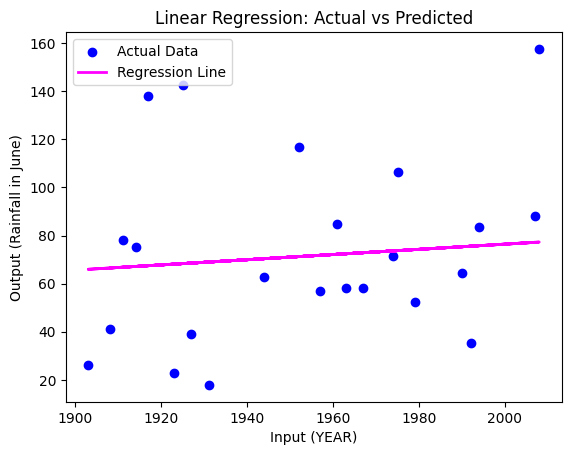

In [20]:
# Plot the data points
plt.scatter(x_test, y_test, color='blue', label='Actual Data')

# Plot the regression line
plt.plot(x_test, y_pred, color='magenta', linewidth=2, label='Regression Line')

# Add labels and title
plt.xlabel('Input (YEAR)')
plt.ylabel('Output (Rainfall in June)')
plt.title('Linear Regression: Actual vs Predicted')

# Show legend
plt.legend()

# Show the plot
plt.show()

In [22]:
# Metrics

# Calculate Mean Absolute Error (MAE)
mae = mean_absolute_error(y_test, y_pred)

# Calculate Mean Squared Error (MSE)
mse = mean_squared_error(y_test, y_pred)

# Calculate Root Mean Squared Error (RMSE)
rmse = np.sqrt(mse)

# Display the evaluation metrics
print(f"Mean Absolute Error (MAE): {mae}")
print(f"Mean Squared Error (MSE): {mse}")
print(f"Root Mean Squared Error (RMSE): {rmse}")

Mean Absolute Error (MAE): 29.17768573873959
Mean Squared Error (MSE): 1358.971277512646
Root Mean Squared Error (RMSE): 36.86422761312986


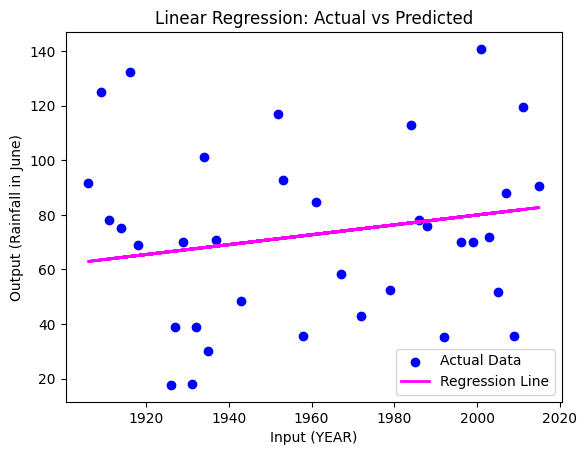

Mean Absolute Error (MAE): 26.371794328179597
Mean Squared Error (MSE): 1039.375729912461
Root Mean Squared Error (RMSE): 32.239350643467695


In [23]:
# Same operations as above but using 70-30 split

# TRAIN and TEST Variables
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=69)

# Build a Linear Regression model for predicting the future rainfall.
model = LinearRegression().fit(x_train,y_train)

# Predict the output
y_pred = model.predict(x_test) #using the input testing values, we predict the output

# Plot the data points
plt.scatter(x_test, y_test, color='blue', label='Actual Data')

# Plot the regression line
plt.plot(x_test, y_pred, color='magenta', linewidth=2, label='Regression Line')

# Add labels and title
plt.xlabel('Input (YEAR)')
plt.ylabel('Output (Rainfall in June)')
plt.title('Linear Regression: Actual vs Predicted')

# Show legend
plt.legend()

# Show the plot
plt.show()

# Calculate Mean Absolute Error (MAE)
mae = mean_absolute_error(y_test, y_pred)

# Calculate Mean Squared Error (MSE)
mse = mean_squared_error(y_test, y_pred)

# Calculate Root Mean Squared Error (RMSE)
rmse = np.sqrt(mse)

# Display the evaluation metrics
print(f"Mean Absolute Error (MAE): {mae}")
print(f"Mean Squared Error (MSE): {mse}")
print(f"Root Mean Squared Error (RMSE): {rmse}")

Applying Linear Regression on Standard Scaled data.

In [24]:
# INPUT(x) - YEAR
# OUTPUT(y) - Rainfall in June
x = df[[year]]
print("x = ", x)
y = df[rainfall]
print("y = ", y)

x =       YEAR
0    1901
1    1902
2    1903
3    1904
4    1905
..    ...
112  2011
113  2012
114  2013
115  2014
116  2015

[115 rows x 1 columns]
y =  0       22.7
1       59.9
2       26.2
3       53.4
4       23.1
       ...  
112    119.5
113     21.7
114    155.0
115     31.3
116     90.6
Name: Rainfall in June, Length: 115, dtype: float64


In [25]:
# Apply Standard Scaling
scaler = StandardScaler()
x_standard_scaled = scaler.fit_transform(x)

# First for 80-20 split
x_train, x_test, y_train, y_test = train_test_split(x_standard_scaled, y, test_size=0.2, random_state=4)

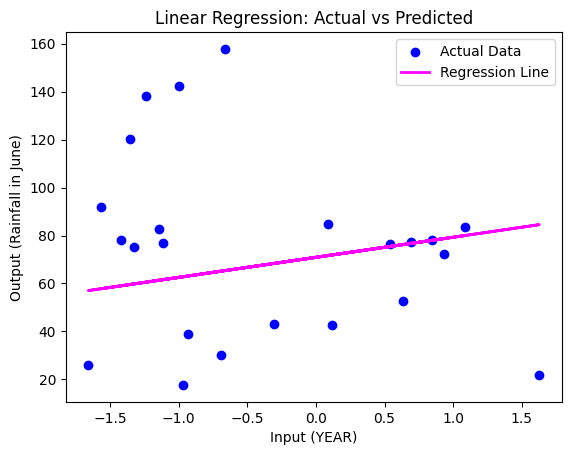

Mean Absolute Error (MAE): 31.158765064776414
Mean Squared Error (MSE): 1655.7401501163201
Root Mean Squared Error (RMSE): 40.69078704223255


In [26]:
# Build a Linear Regression model for predicting the future rainfall.
model = LinearRegression().fit(x_train,y_train)

# Predict the output
y_pred = model.predict(x_test) #using the input testing values, we predict the output

# Plot the data points
plt.scatter(x_test, y_test, color='blue', label='Actual Data')

# Plot the regression line
plt.plot(x_test, y_pred, color='magenta', linewidth=2, label='Regression Line')

# Add labels and title
plt.xlabel('Input (YEAR)')
plt.ylabel('Output (Rainfall in June)')
plt.title('Linear Regression: Actual vs Predicted')

# Show legend
plt.legend()

# Show the plot
plt.show()

# Calculate Mean Absolute Error (MAE)
mae = mean_absolute_error(y_test, y_pred)

# Calculate Mean Squared Error (MSE)
mse = mean_squared_error(y_test, y_pred)

# Calculate Root Mean Squared Error (RMSE)
rmse = np.sqrt(mse)

# Display the evaluation metrics
print(f"Mean Absolute Error (MAE): {mae}")
print(f"Mean Squared Error (MSE): {mse}")
print(f"Root Mean Squared Error (RMSE): {rmse}")

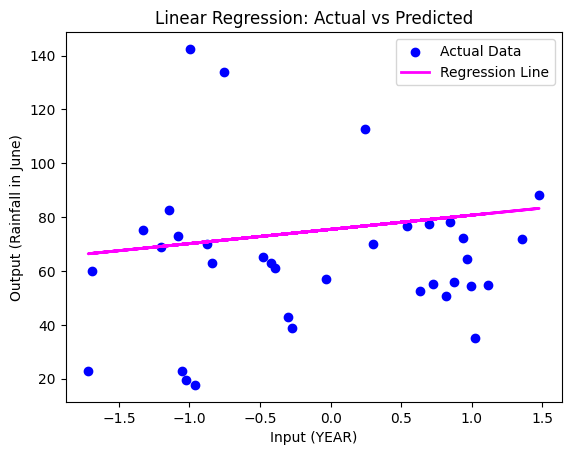

Mean Absolute Error (MAE): 22.074506095199702
Mean Squared Error (MSE): 849.6074673309832
Root Mean Squared Error (RMSE): 29.148026817110335


In [28]:
# Same operations as above but using 70-30 split

# TRAIN and TEST Variables
x_train, x_test, y_train, y_test = train_test_split(x_standard_scaled, y, test_size=0.3, random_state=49)

# Build a Linear Regression model for predicting the future rainfall.
model = LinearRegression().fit(x_train,y_train)

# Predict the output
y_pred = model.predict(x_test) #using the input testing values, we predict the output

# Plot the data points
plt.scatter(x_test, y_test, color='blue', label='Actual Data')

# Plot the regression line
plt.plot(x_test, y_pred, color='magenta', linewidth=2, label='Regression Line')

# Add labels and title
plt.xlabel('Input (YEAR)')
plt.ylabel('Output (Rainfall in June)')
plt.title('Linear Regression: Actual vs Predicted')

# Show legend
plt.legend()

# Show the plot
plt.show()

# Calculate Mean Absolute Error (MAE)
mae = mean_absolute_error(y_test, y_pred)

# Calculate Mean Squared Error (MSE)
mse = mean_squared_error(y_test, y_pred)

# Calculate Root Mean Squared Error (RMSE)
rmse = np.sqrt(mse)

# Display the evaluation metrics
print(f"Mean Absolute Error (MAE): {mae}")
print(f"Mean Squared Error (MSE): {mse}")
print(f"Root Mean Squared Error (RMSE): {rmse}")

Applying Linear Regression on MinMax Scaled data.

In [29]:
# INPUT(x) - YEAR
# OUTPUT(y) - Rainfall in June
x = df[[year]]
print("x = ", x)
y = df[rainfall]
print("y = ", y)

x =       YEAR
0    1901
1    1902
2    1903
3    1904
4    1905
..    ...
112  2011
113  2012
114  2013
115  2014
116  2015

[115 rows x 1 columns]
y =  0       22.7
1       59.9
2       26.2
3       53.4
4       23.1
       ...  
112    119.5
113     21.7
114    155.0
115     31.3
116     90.6
Name: Rainfall in June, Length: 115, dtype: float64


In [30]:
# Apply Standard Scaling
scaler = MinMaxScaler()
x_minmax_scaled = scaler.fit_transform(x)

# First for 80-20 split
x_train, x_test, y_train, y_test = train_test_split(x_minmax_scaled, y, test_size=0.2, random_state=9)

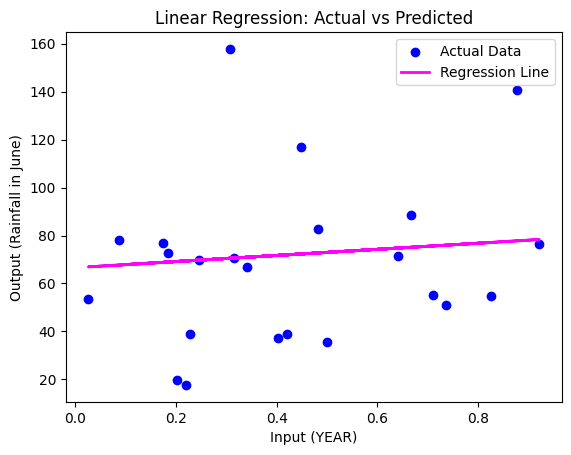

Mean Absolute Error (MAE): 24.717556093525598
Mean Squared Error (MSE): 1111.048148536946
Root Mean Squared Error (RMSE): 33.33238888134101


In [31]:
# Build a Linear Regression model for predicting the future rainfall.
model = LinearRegression().fit(x_train,y_train)

# Predict the output
y_pred = model.predict(x_test) #using the input testing values, we predict the output

# Plot the data points
plt.scatter(x_test, y_test, color='blue', label='Actual Data')

# Plot the regression line
plt.plot(x_test, y_pred, color='magenta', linewidth=2, label='Regression Line')

# Add labels and title
plt.xlabel('Input (YEAR)')
plt.ylabel('Output (Rainfall in June)')
plt.title('Linear Regression: Actual vs Predicted')

# Show legend
plt.legend()

# Show the plot
plt.show()

# Calculate Mean Absolute Error (MAE)
mae = mean_absolute_error(y_test, y_pred)

# Calculate Mean Squared Error (MSE)
mse = mean_squared_error(y_test, y_pred)

# Calculate Root Mean Squared Error (RMSE)
rmse = np.sqrt(mse)

# Display the evaluation metrics
print(f"Mean Absolute Error (MAE): {mae}")
print(f"Mean Squared Error (MSE): {mse}")
print(f"Root Mean Squared Error (RMSE): {rmse}")

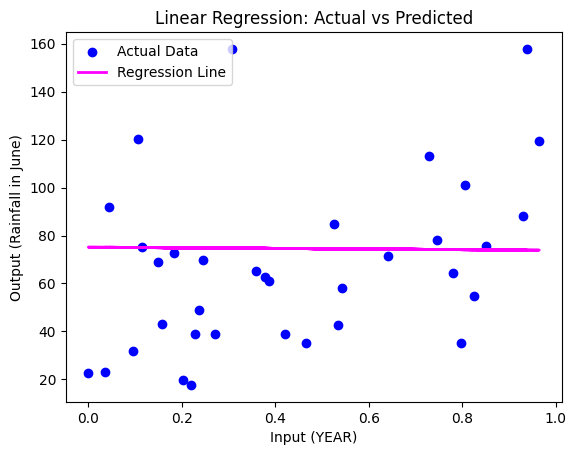

Mean Absolute Error (MAE): 28.6334725410749
Mean Squared Error (MSE): 1295.512490281411
Root Mean Squared Error (RMSE): 35.993228394816306


In [32]:
# Same operations as above but using 70-30 split

# TRAIN and TEST Variables
x_train, x_test, y_train, y_test = train_test_split(x_minmax_scaled, y, test_size=0.3, random_state=94)

# Build a Linear Regression model for predicting the future rainfall.
model = LinearRegression().fit(x_train,y_train)

# Predict the output
y_pred = model.predict(x_test) #using the input testing values, we predict the output

# Plot the data points
plt.scatter(x_test, y_test, color='blue', label='Actual Data')

# Plot the regression line
plt.plot(x_test, y_pred, color='magenta', linewidth=2, label='Regression Line')

# Add labels and title
plt.xlabel('Input (YEAR)')
plt.ylabel('Output (Rainfall in June)')
plt.title('Linear Regression: Actual vs Predicted')

# Show legend
plt.legend()

# Show the plot
plt.show()

# Calculate Mean Absolute Error (MAE)
mae = mean_absolute_error(y_test, y_pred)

# Calculate Mean Squared Error (MSE)
mse = mean_squared_error(y_test, y_pred)

# Calculate Root Mean Squared Error (RMSE)
rmse = np.sqrt(mse)

# Display the evaluation metrics
print(f"Mean Absolute Error (MAE): {mae}")
print(f"Mean Squared Error (MSE): {mse}")
print(f"Root Mean Squared Error (RMSE): {rmse}")